<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course-content/Module2/DL_L2_Regularization_IMDB_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original tutorial at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [1]:
import keras
from keras import models
from keras import layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


## Prepare Dataset

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [4]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## The Original Training

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 272us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoc

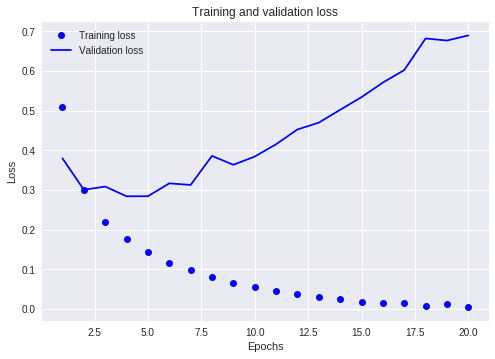

In [7]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 104us/step
[0.7628738589358329, 0.85076]


## L2 Loss with 0.001 
l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network

In [9]:
model_l2_001 = models.Sequential()
model_l2_001.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_l2_001.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_l2_001.add(layers.Dense(1, activation='sigmoid'))

model_l2_001.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_l2_001 = model_l2_001.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.5735 - acc: 0.7909 - val_loss: 0.4506 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.3787 - acc: 0.8956 - val_loss: 0.3670 - val_acc: 0.8842
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.3017 - acc: 0.9185 - val_loss: 0.3420 - val_acc: 0.8876
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2646 - acc: 0.9290 - val_loss: 0.3434 - val_acc: 0.8814
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2396 - acc: 0.9393 - val_loss: 0.3323 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2243 - acc: 0.9451 - val_loss: 0.3600 - val_acc: 0.8780
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2116 - acc: 0.9495 - val_loss: 0.3525 - val_a

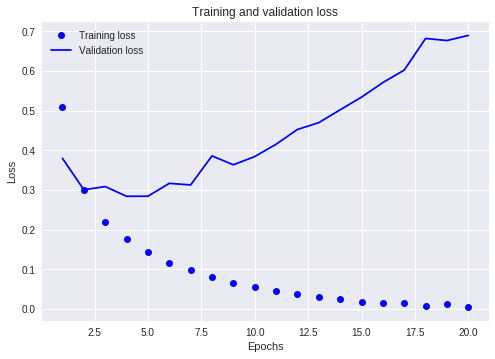

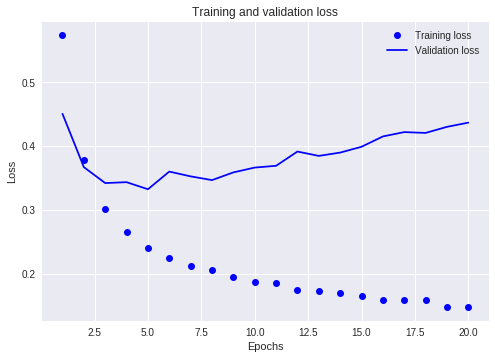

In [10]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs = range(1, len(history_l2_001.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history_l2_001.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history_l2_001.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Does regularization improve the overall performance?

In [11]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 100us/step
[0.7628738589358329, 0.85076]


In [12]:
results = model_l2_001.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 103us/step
[0.4573013272857666, 0.86448]


## Regularize more?

In [13]:
model_l2_01 = models.Sequential()
model_l2_01.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(10000,)))
model_l2_01.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_l2_01.add(layers.Dense(1, activation='sigmoid'))

model_l2_01.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_l2_01 = model_l2_01.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.7795 - acc: 0.7766 - val_loss: 0.6293 - val_acc: 0.8556
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.5800 - acc: 0.8743 - val_loss: 0.5657 - val_acc: 0.8606
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.5213 - acc: 0.8889 - val_loss: 0.5179 - val_acc: 0.8789
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.4847 - acc: 0.8935 - val_loss: 0.4946 - val_acc: 0.8798
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.4627 - acc: 0.8938 - val_loss: 0.4882 - val_acc: 0.8723
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.4397 - acc: 0.9007 - val_loss: 0.4654 - val_acc: 0.8823
Epoch 7/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.4357 - acc: 0.8939 - val_loss: 0.4578 - val_

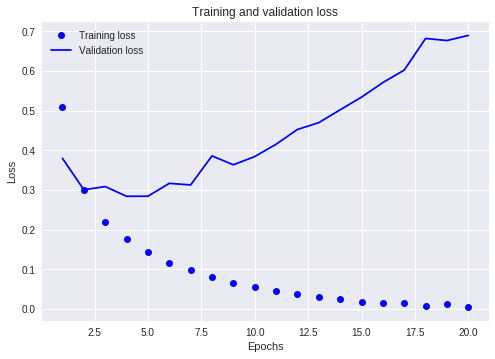

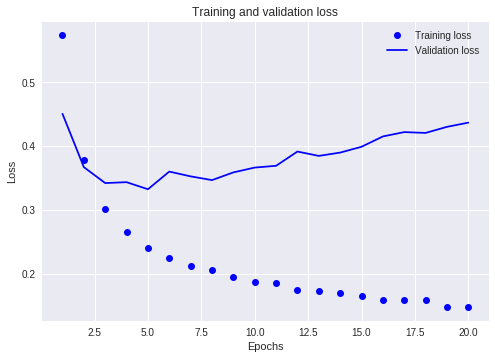

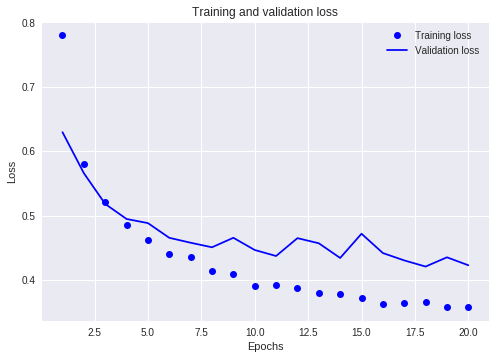

In [14]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs = range(1, len(history_l2_001.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history_l2_001.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history_l2_001.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

epochs = range(1, len(history_l2_01.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history_l2_01.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history_l2_01.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Does additional regularization further improve the performance?

In [15]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 2s 99us/step
[0.7628738589358329, 0.85076]


In [16]:
results = model_l2_001.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 108us/step
[0.4573013272857666, 0.86448]


In [17]:
results = model_l2_01.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 104us/step
[0.43289767948150637, 0.87424]


## Should we regularize more?

In [18]:
model_l2_1 = models.Sequential()
model_l2_1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.1), activation='relu', input_shape=(10000,)))
model_l2_1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.1), activation='relu'))
model_l2_1.add(layers.Dense(1, activation='sigmoid'))

model_l2_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_l2_1 = model_l2_1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 121us/step - loss: 2.4592 - acc: 0.7054 - val_loss: 1.8616 - val_acc: 0.7065
Epoch 2/20
15000/15000 [==============================] - 1s 100us/step - loss: 1.7034 - acc: 0.8200 - val_loss: 1.5824 - val_acc: 0.8280
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 1.4771 - acc: 0.8147 - val_loss: 1.3747 - val_acc: 0.8292
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 1.2868 - acc: 0.8115 - val_loss: 1.2221 - val_acc: 0.7753
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 1.1333 - acc: 0.8145 - val_loss: 1.0643 - val_acc: 0.8278
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 1.0064 - acc: 0.8117 - val_loss: 0.9509 - val_acc: 0.8278
Epoch 7/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.9030 - acc: 0.8157 - val_loss: 0.8679 - val

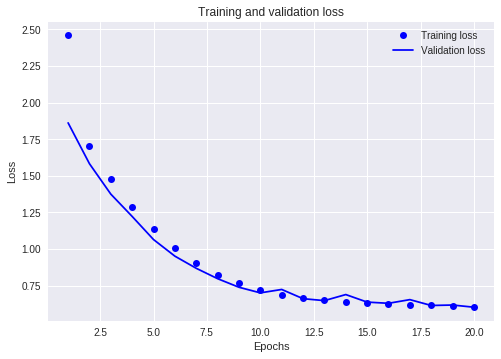

In [19]:
epochs = range(1, len(history_l2_1.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history_l2_1.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history_l2_1.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
results = model_l2_1.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 104us/step
[0.6059242888832093, 0.8454]
